In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# Unsupervised Machine Learning

- No target variable as learning input
- Most popular unsupervised approach is clustering
  - Identify a (ﬁnite) number of cluster (i.e., categories, classes or groups)
  - High similarity of objects within a cluster
  - High dissimilarity of objects from diﬀerent clusters
- Many approaches use distance functions to quantify similarity
  - Minkowski distance $$dist_M(X,Y)={\displaystyle \left(\sum _{i=1}^{d}|x_{i}-y_{i}|^{p}\right)^{1/p}}$$
  - Manhattan distance (p = 1) or Euclidean distance (p = 2)
**Important**: Standardization/scaling (e.g., z-scores)

## Categorization
- Partitioning: Find a partition of k clusters by minimizing a cost function based on distances.
- Hierarchical: Determine clusters using a distance function and determine cluster hierarchies.
- Density based: Determine clusters based on density measures using a distance function.
- Further approaches (e.g., Fuzzy Clustering, Self Organizing Maps etc.)

## Partition based approach
- Parameter: Number of clusters $k$
- Searches „flat“ clustering (no hierarchy) by minimizing a cost function
- Uses distance function to quantify similarity (often Euclidean distance)
  - Small distance $\rightarrow$ similiar objects
  - High distance $\rightarrow$ dissimilar objects
- Standardization/scaling (e.g., z-scores) important


## Partition based approach cont. 
- Algorithm
  - Start with a random initial partition into k clusters
  - Assign each object to its closest representative (centroid)
  - Recalculate representative (centroid)
  - Repeat until there are no changes

- Extension: Recalculate centroid only if an object changes its cluster (*kMeans*)

## Partition based approach cont.
### Example kMeans (k=2)
![kMeans Step 1](images/kmeansS1.png)

## Partition based approach cont.
### Example kMeans (k=2)
![kMeans Step 2](images/kmeansS2.png)

## Partition based approach cont.
### Pros
- Simple
- Efficient

### Cons
- Parameter k required (often diﬃcult to determine) 
- Prone to noise 
- Depends on initial clustering (extensions such as sampling) 
- Convex cluster forms required

## Partition based approach example

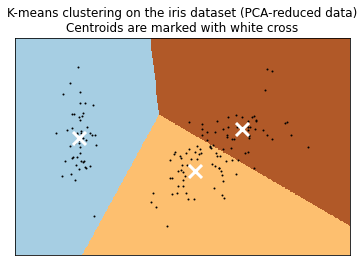

In [37]:
iris = datasets.load_iris()
X = iris.data
X_s = StandardScaler().fit_transform(X)
X_red = PCA(n_components=2).fit_transform(X_s)
clus_kmeans = KMeans(n_clusters=3)
clus_kmeans.fit(X_red)

h = 0.02
x_min, x_max = X_red[:, 0].min() - 1, X_red[:, 0].max() + 1
y_min, y_max = X_red[:, 1].min() - 1, X_red[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = clus_kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(X_red[:, 0], X_red[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = clus_kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the iris dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Hierarchical clustering

- Generate a hierarchy of clusters (dendrogram) by merging clusters with a minimal distance to each other
- Dendrogram
   - Root represents a cluster with all objects
   - Leafs represent single objects
   - Inner edges represents the union of objects of the lower subtree
 - Methods
   - Bottom-up (agglomerative)
   - Top-down (divise)

## Hierarchical clustering cont. 
- Algorithm
  - Create initial clusters (each containing one object) and calculate all distances between pairs of these clusters
  - Create a new cluster using two clusters with the smallest distance to each other
  - Determine the distance between the new cluster and the other clusters
  - Repeat step 2 until all objects are within one cluster
- Linkage Methods to calculate distance between clusters X and Y (i.e., a set of objects)
  - Single link $$dist_{SL}(X,Y) = \displaystyle\min_{x \in X, y \in Y} dist(x,y)$$
  - Complete link $$dist_{CL}(X,Y) = \displaystyle\max_{x \in X, y \in Y} dist(x,y)$$
  - Average link $$dist_{AL}(X,Y) = \frac{1}{|X||Y|}\displaystyle\sum_{x \in X, y \in Y} dist(x,y)$$

## Hierarchical clustering cont.
### Pros
- Parameter *k* is not required
- Identiﬁes hierarchies of clusters

### Cons
- Prone to noise (in particular using single link)
 - Inefficient ($\mathcal{O}(n^3)$ for $n$ instances)


## Hierarchichal clustering example 

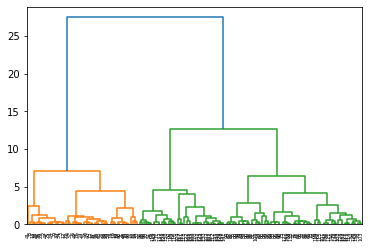

In [20]:
link_data = linkage(X_red, method="ward", metric="euclidean")
dendrogram(link_data);

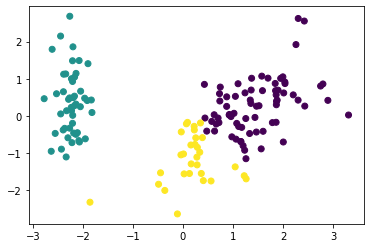

In [36]:
clus_hier = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
labels = clus_hier.fit_predict(X_s)

plt.scatter(X_red[:,0], X_red[:,1], c=labels)
plt.show()

## Density based clustering

- Clusters are dense regions in a d-dimensional space
- Clusters are separated by regions of smaller density
- Local density of each object of a cluster is greater than a deﬁned threshold
- The set of objects of a cluster must be connected
- Object 𝑜∈ 𝑂 is a core object if |𝑁_𝜖 |≥𝑚𝑖𝑛𝑃𝑡𝑠, where |N_𝜖 |= \{𝑜′∈ 𝑂 | 𝑑𝑖𝑠𝑡(𝑜, 𝑜′ )≤𝜖\} (corresponding objects are directly reachable)
- Objects p, q ∈ O are reachable if there is a path of directly reachable objects from q to p
- All points of a cluster are mutally density connected

## Density based clustering cont. 

- Algorithm (DBSCAN) 
  - Identify core points
  - Find the connected components of core points
  - Assign each non-core point to a nearby clusters (within 𝜖). The remaining objects are noise.

## Density based clustering cont. 

- Pros
  - Parameter k is not required
  - Arbitrarily shaped clusters
  - Robust to noise

- Cons 
  - Appropriate parameter settings and distance function

## Density based clustering example

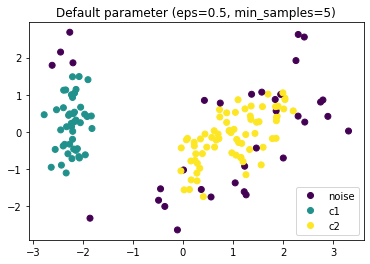

In [81]:
clus_db = DBSCAN(eps=0.5, min_samples=5).fit(X_s)
labels_db = clus_db.fit_predict(X_s)

scatter = plt.scatter(X_red[:,0], X_red[:,1], c=labels_db)
plt.title("Default parameter (eps=0.5, min_samples=5)")
plt.legend(handles=scatter.legend_elements()[0], labels=["noise","c1","c2"])
plt.show()

## Clustering with categoric attributes
- Use mode (m) instead centroid (k-mode)
$$TD(C) = {\displaystyle \sum_{o \in C} dist(o,m)}$$
- Distance function for categoric attributes
$$dist(X,Y)= \sum _{i=1}^{n} \delta (x_i,y_i)$$
$$\delta = \begin{cases} 0 & \mbox{ if } x_i = y_i \\1 &  \mbox{ else }\end{cases}$$


## Clustering performance evaluation
- Aim: Quantify the performance of a resulting clustering
- Categories
  - Internal: Measures derived directly from the data
  - External: Measures derived using previous knowledge 
  - Examples 
    - Internal: Ball-Hall index, Ball-Hall index, Davies-Bouldin index, Silhouette index, …
    - External: Czekanowski-Dice index, Folkes-Mallows index, Jaccard index, ...